### Importing initial essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
Data = pd.read_csv(r"D:\#1 DataScience\DataSet\Machine Learning\Projects\bengaluru_house_prices.csv")
Data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Performing data prerequisites

In [3]:
# Checking the shape of the data

Data.shape

(13320, 9)

In [4]:
# Checking the info

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
# Checking the stats

Data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
# Checking the number of variables in area_type

Data['area_type'].value_counts().sort_values(ascending = False)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
# Dropping certain columns and keeping the rest

Data1 = Data.drop(['area_type', 'availability', 'society', 'balcony'], axis = 1)
Data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data Cleaning

In [8]:
# Looking out for the null values

Data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

- Dropping the null rows

In [9]:
Data_Final = Data1.dropna()
Data_Final.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
Data_Final.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


- Under the size column we can see the non-uniformity in the names

In [11]:
Data_Final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [12]:
Data_Final['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

- Creating a new BHK column to get the uniformity in the dataset

In [13]:
Data_Final = Data_Final.copy() ## This ensures that you are working with a copy of the DataFrame 
                               ## and not a view, which also helps avoid the warning.
 
Data_Final['BHK'] = Data_Final['size'].apply(lambda x: int(x.split(" ")[0]) )
Data_Final.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
Data_Final['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
# Checking the total_sqft column

Data_Final['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

- We could see that it also contains the values like '1133 - 1384', and might contain more, so need to handle it
- Moreover, we saw that it is an object type data type

In [16]:
# Creating a fucntion that can classify the entries as float and not float

def is_float(x):   ## This line defines a function named is_float that takes a single argument x
    try:           ## Within the try block, the function attempts to convert x to a floating-point
        float(x)      ## number using the float() function.
    except:
        return False  ## If an exception occurs during the conversion (e.g., x cannot be converted to a float), 
    return True          ##  the function catches the exception with the except block and returns False.

In [17]:
Data_Final[~ Data_Final['total_sqft'].apply(is_float)] ## ~ negates the True outcome

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
Data_Final[~ Data_Final['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


- Here on, we would take the average of the values with range.
- Other than that, we would ignore that entry

In [19]:
# Creating another function for the problem above

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None ## If the list tokens does not contain exactly two elements, 
                    ## the function attempts to convert the entire input string x to a float. 
                    ## If the conversion is successful, it returns the float value. 
                    ## If any exception occurs during the conversion (e.g., if x cannot be converted to a float), 
                    ## the function catches the exception and returns None.

In [20]:
# Checking the above function

convert_sqft_to_num('245')

245.0

In [21]:
convert_sqft_to_num('3090 - 5002')

4046.0

In [22]:
convert_sqft_to_num('34.46Sq. Meter') ## It is not giving any output, which shows that this is correct

In [23]:
# Applying the above defined function to the column and creating a new DataFrame

Data_Tranf = Data_Final.copy()

Data_Tranf['total_sqft'] = Data_Tranf['total_sqft'].apply(convert_sqft_to_num)
Data_Tranf.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
# Checking the transformation

Data_Tranf.loc[[30, 410]]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2475.0,4.0,186.0,4
410,Kengeri,1 BHK,NaN,1.0,18.5,1


In [25]:
Data_Tranf.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [26]:
Data_Tranf.shape

(13246, 6)

### Feature Engineering

In [27]:
# Finding the price per square feet under the column name 'price_psft'

Data_Feat = Data_Tranf.copy()

Data_Feat['price_psft'] = Data_Feat['price']*100000/Data_Feat['total_sqft']
Data_Feat.head()

,location,size,total_sqft,bath,price,BHK,price_psft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
# Looking into the location column

len(Data_Feat.location.unique())

1304

- In case we perform OHE on the location it would lead to around 1300+ columns into our dataset
- It can create an issue of dimensionality curse

In [29]:
# Checking how many data points are available for location

Data_Feat['location'] = Data_Feat['location'].apply(lambda x: x.strip())

Location_Stats = Data_Feat['location'].value_counts().sort_values(ascending = False)
Location_Stats

location
Whitefield                       535
Sarjapur  Road                   392
Electronic City                  304
Kanakpura Road                   266
Thanisandra                      236
                                ... 
Old Mangammanapalya Road           1
HAL Layout                         1
Gubbi Cross, Hennur Main Road      1
Jeevanhalli                        1
Abshot Layout                      1
Name: count, Length: 1293, dtype: int64

In [30]:
# Now, all the locations that corresponds to 1 or 10 row, putting them under 'Others'

len(Location_Stats[Location_Stats <= 10])

1052

In [31]:
Locations_Under10 = Location_Stats[Location_Stats <= 10]
Locations_Under10

location
Ganga Nagar                      10
Nagadevanahalli                  10
Dodsworth Layout                 10
1st Block Koramangala            10
Kalkere                          10
                                 ..
Old Mangammanapalya Road          1
HAL Layout                        1
Gubbi Cross, Hennur Main Road     1
Jeevanhalli                       1
Abshot Layout                     1
Name: count, Length: 1052, dtype: int64

In [32]:
# Applying the condition into the dataframe

Data_Feat['location'] = Data_Feat['location'].apply(lambda x: 'other' if x in Locations_Under10 else x)

len(Data_Feat.location.unique()) ## We can see that now we have 242 unique rows under location

242

In [33]:
# Checking the above result within the dataframe

Data_Feat.head(15)

,location,size,total_sqft,bath,price,BHK,price_psft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier detection and removal

In [34]:
Data_Feat.shape

(13246, 7)

In [35]:
# Taking only those rows where per sqft is less than 300

Data_In = Data_Feat[~ (Data_Feat['total_sqft']/Data_Feat['BHK'] < 300)]
Data_In.head()

,location,size,total_sqft,bath,price,BHK,price_psft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
Data_In.shape

(12502, 7)

In [37]:
# Checking the price per sqfte()

Data_In.price_psft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_psft, dtype: float64

- As we can see above, the minimum and the maximum values seems to be hypothetical

In [38]:
# Need to remove the outlier per location, so we will be needing mean per location for that

def Remove_Location_Out(Data): ## Takes one argument Data, which is expected to be a pandas DataFrame.
    Data_Out = pd.DataFrame()  ## Data_Out is initialized as an empty DataFrame to store the processed data without outliers.
    for key, subdf in Data.groupby('location'):
        m = np.mean(subdf.price_psft)
        st = np.std(subdf.price_psft)
        Reduced_Data = subdf[(subdf.price_psft > (m-st)) & (subdf.price_psft <= (m+st))]
        Data_Out = pd.concat([Data_Out, Reduced_Data], ignore_index = True)
    return Data_Out

In [39]:
Data_Outlier = Remove_Location_Out(Data_In)
Data_Outlier.shape

(10241, 7)

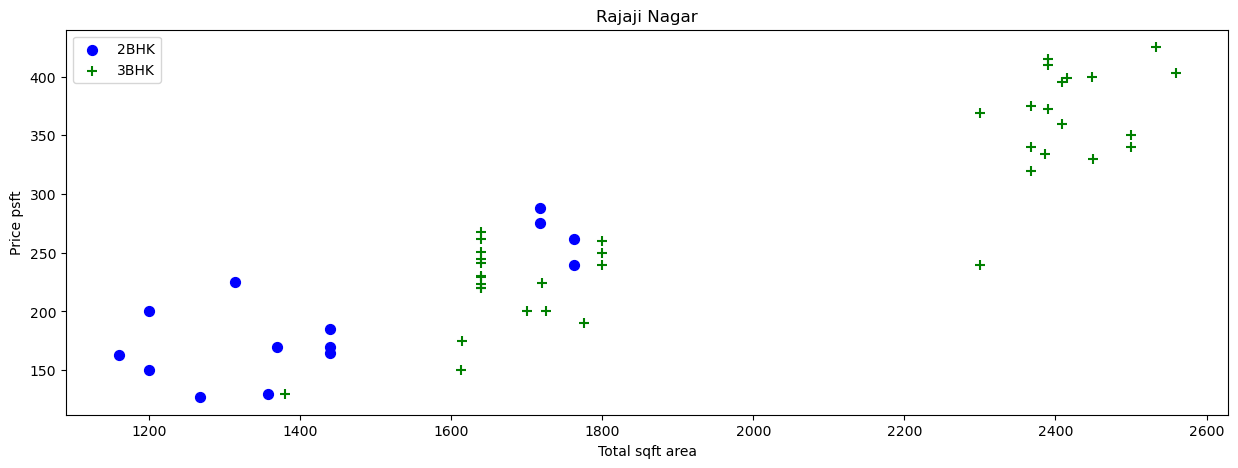

In [40]:
def Plot_Scatter_Plot(Data, location):
    BHK2 = Data[(Data.location == location) & (Data.BHK == 2)]
    BHK3 = Data[(Data.location == location) & (Data.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 5)
    plt.scatter(BHK2.total_sqft, BHK2.price, color = 'b', label = '2BHK', s = 50)
    plt.scatter(BHK3.total_sqft, BHK3.price, color = 'g', marker = '+', label = '3BHK', s = 50)
    plt.xlabel("Total sqft area")
    plt.ylabel("Price psft")
    plt.title(location)
    plt.legend()
    
Plot_Scatter_Plot(Data_Outlier, "Rajaji Nagar")

- At around 1700 sqft the prices of 2BHK are higher than 3 BHK, so such outliers need to be removed

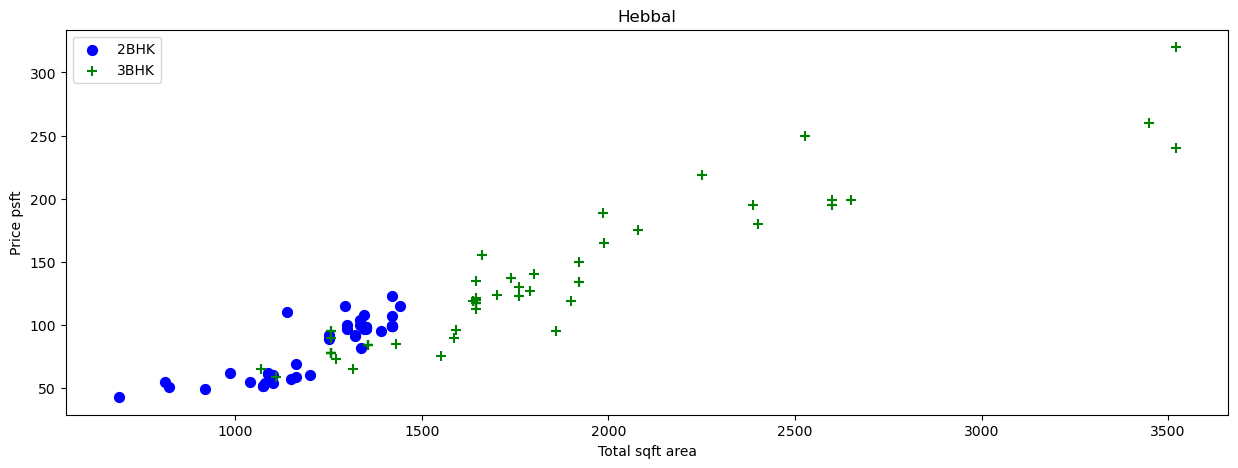

In [41]:
Plot_Scatter_Plot(Data_Outlier, "Hebbal")

- A similar case can be seen in the graph above, between the range 1000-1500 there are 2BHK house who are more costly than 3BHK 

In [42]:
# Removing the 3 BHKs having value less than the mean of 2 BHK grouped by location

def process_dataframe(df):
    # Step 1: Group by location
    grouped = df.groupby('location')
    
    # Step 2: Calculate mean of 'price_psft' for 2 BHK properties
    mean_2bhk_price_psft = grouped.apply(lambda x: x[x['BHK'] == 2]['price_psft'].mean())
    
    # Step 3: Remove rows where 3 BHK properties have 'price_psft' less than the mean value of 2 BHK
    def filter_3bhk(row):
        location_mean_price = mean_2bhk_price_psft.get(row['location'], float('inf'))
        if row['BHK'] == 3 and row['price_psft'] < location_mean_price:
            return False
        return True
    
    filtered_df = df[df.apply(filter_3bhk, axis=1)]
    
    return filtered_df

# Example usage with the sample DataFrame
Filtered_Data = process_dataframe(Data_Outlier)
Filtered_Data.shape


(8571, 7)

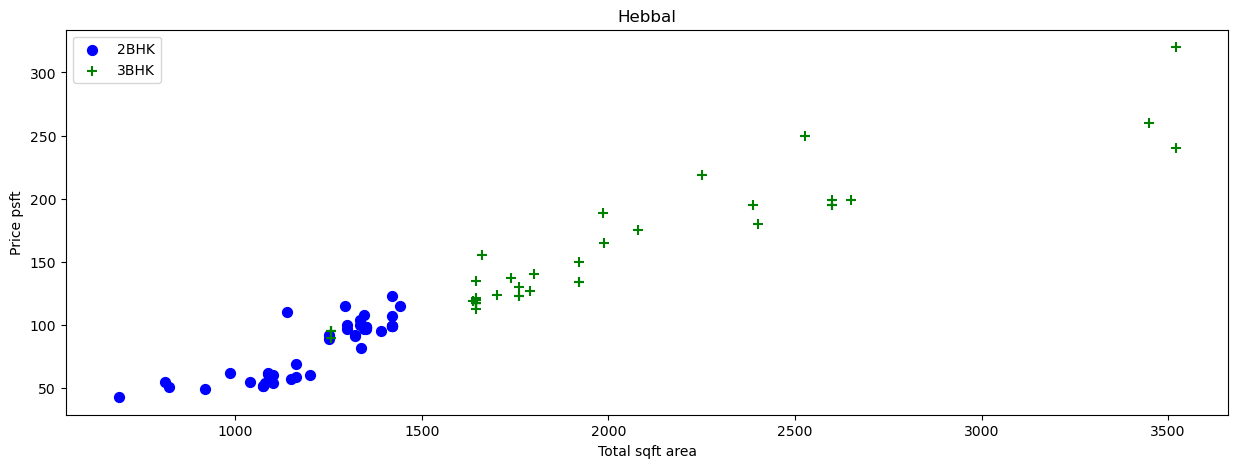

In [43]:
Plot_Scatter_Plot(Filtered_Data, "Hebbal")

- So, we can see that now the data is much less overlaped as compared to the earlier one

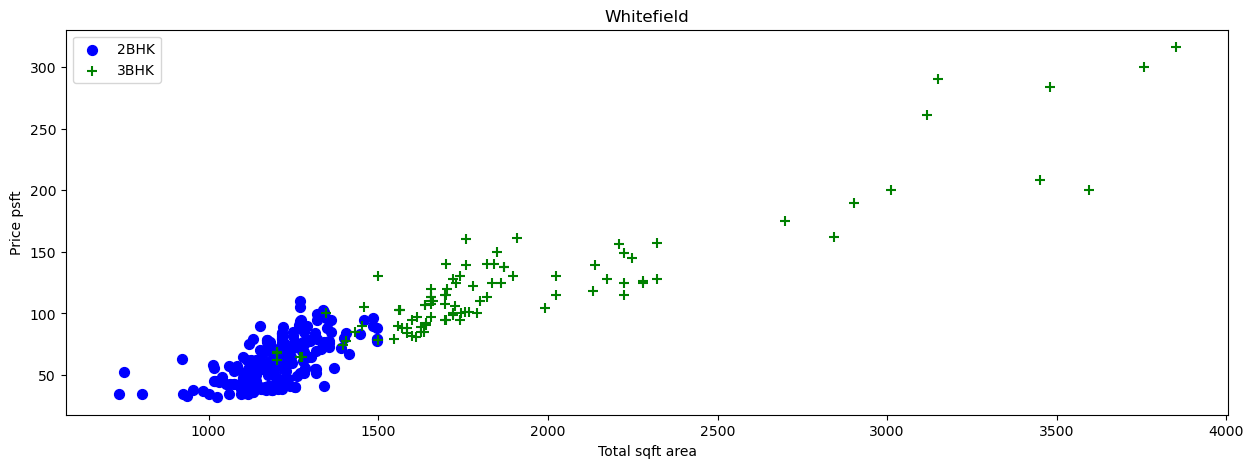

In [44]:
Plot_Scatter_Plot(Filtered_Data, "Whitefield")

[]

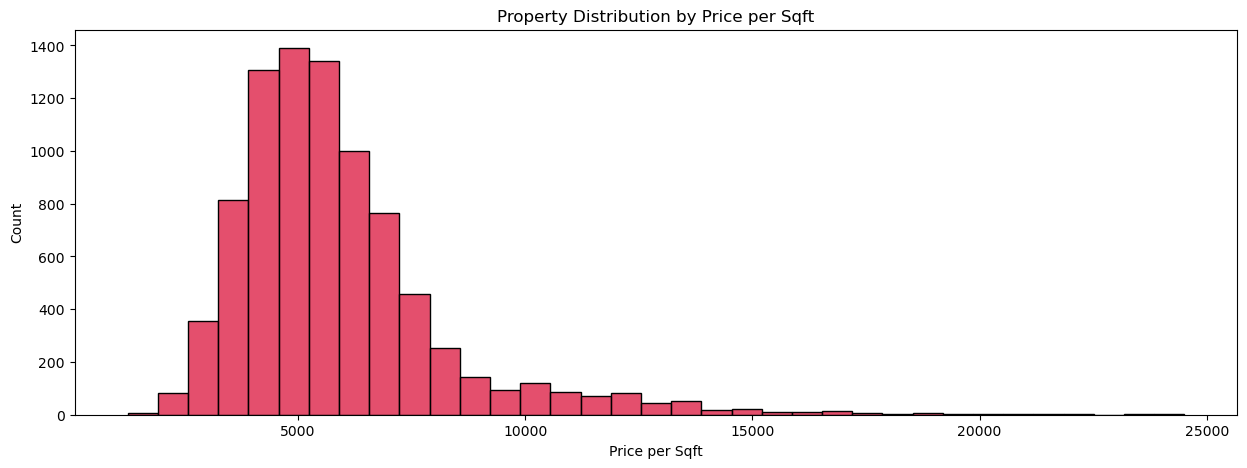

In [45]:
# Plotting the histogram

sns.histplot(Filtered_Data, x = Filtered_Data['price_psft'], bins = 35, color = 'crimson')

plt.title('Property Distribution by Price per Sqft')
plt.xlabel('Price per Sqft')
plt.plot()

- we can see that the dataset has the bell curve, a normal distribution

In [46]:
# Exploring the bathroom features

Filtered_Data.bath.unique()

array([ 4.,  2.,  3.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
Filtered_Data[Filtered_Data.bath > 9]

,location,size,total_sqft,bath,price,BHK,price_psft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


[]

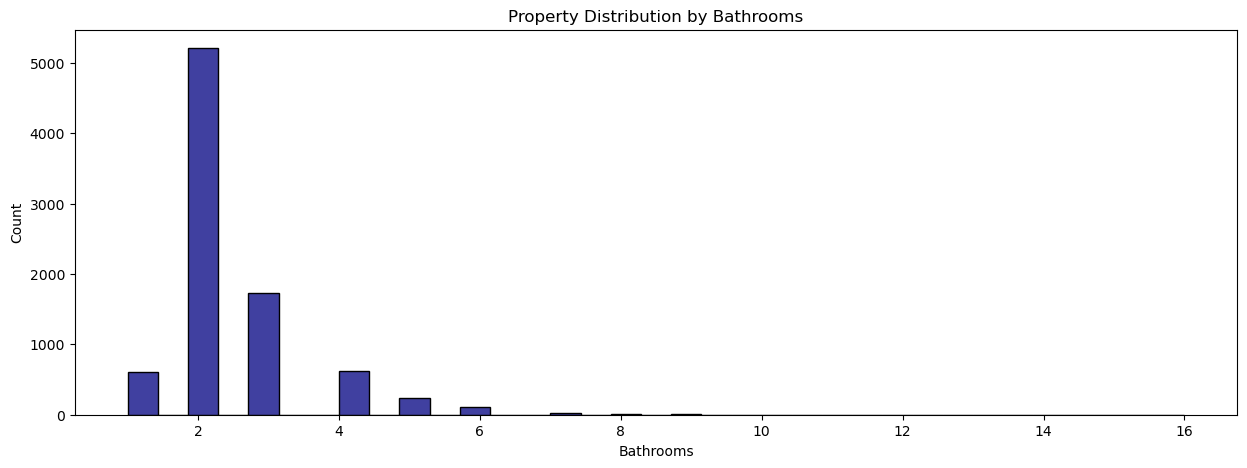

In [48]:
# Plotting the histplot for bath

sns.histplot(Filtered_Data, x = Filtered_Data['bath'], bins = 35, color = 'navy')

plt.title('Property Distribution by Bathrooms')
plt.xlabel('Bathrooms')
plt.plot()

- We can see that most of the properties have 2 bathrooms, then 4, 6 and so on.
- So, there are less outliers that have more number of bathrooms

- So, anytime if the data have bath > BHK + 2, remove it

In [49]:
Filtered_Data[(Filtered_Data.bath) > (Filtered_Data.BHK + 2)]

,location,size,total_sqft,bath,price,BHK,price_psft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


- Here, we got the outliers as per the requirement

In [50]:
Final_Filter_Data = Filtered_Data.drop([1626, 5238, 6711, 8411], axis = 0)
Final_Filter_Data.shape

(8567, 7)

In [51]:
Final_Filter_Data

,location,size,total_sqft,bath,price,BHK,price_psft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
...,...,...,...,...,...,...,...
10235,other,2 BHK,1256.0,2.0,65.0,2,5175.159236
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443
10239,other,2 BHK,1075.0,2.0,48.0,2,4465.116279


### Model Building

In [52]:
ML_Data = Final_Filter_Data.drop(['size', 'price_psft'], axis = 1)
ML_Data

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
2,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
...,...,...,...,...,...
10235,other,1256.0,2.0,65.0,2
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1
10239,other,1075.0,2.0,48.0,2


### Model Building

In [53]:
ML_Data.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
2,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4


In [54]:
ML_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8567 entries, 0 to 10240
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    8567 non-null   object 
 1   total_sqft  8567 non-null   float64
 2   bath        8567 non-null   float64
 3   price       8567 non-null   float64
 4   BHK         8567 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 401.6+ KB


In [55]:
# Converting the first olumn using OHE

Dummy_Data = pd.get_dummies(ML_Data.location, dtype = 'int')
Dummy_Data.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
Encoded_Data = pd.concat([ML_Data, Dummy_Data.drop('other', axis = 1)], axis = 1)
Encoded_Data.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Dropping the 'location' column

Final_Encode = Encoded_Data.drop('location', axis = 1)
Final_Encode.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
Final_Encode.shape

(8567, 245)

In [59]:
# Creating X, containing all independent variable

X_Var = Final_Encode.drop('price', axis = 1)
X_Var.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Creating Y, containing dependent variable

Y_Var = Final_Encode.price
Y_Var.head()

0    428.0
2    235.0
4    148.0
5    413.0
6    368.0
Name: price, dtype: float64

In [61]:
# Using TTS

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Var, Y_Var, test_size = 0.2, random_state = 19)

In [62]:
# Performing simple linear regression

from sklearn.linear_model import LinearRegression

LR_Model = LinearRegression()
LR_Model.fit(X_Train, Y_Train)
LR_Model.score(X_Test, Y_Test)

0.8933577103503603

In [63]:
# Using K fold Cross Validation 

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

CV = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 19)

cross_val_score(LinearRegression(), X_Var, Y_Var, cv = CV)

array([0.89335771, 0.78622381, 0.84003488, 0.80575153, 0.7818379 ])

- However, we need to try the other regression techniques
- In order to do that, we need to use GridSearchCV

In [64]:
# Using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Also importing Decision Tree and Lasso

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Defining function to use GridSearchCV, a.k.a Hyper Parameter Tunning

def Finding_Best_Regression(X_Var, Y_Var):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    Scores = []
    CV = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = CV, return_train_score = False)
        gs.fit(X_Var, Y_Var)
        Scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(Scores, columns = ['model', 'best_score', 'best_params'])

In [65]:
Finding_Best_Regression(X_Var, Y_Var)

,model,best_score,best_params
0,linear_regression,0.801883,"{'copy_X': True, 'fit_intercept': True}"
1,lasso,0.693329,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.683159,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


- Therefore, we can say that the Linear Regression is best suited for the above model
- We already have Linear Regression trained model.

In [66]:
np.where(X_Var.columns == 'Vijayanagar')[0][0]

234

In [67]:
def Price_Prediction(location, total_sqft, bath, BHK):
    loc_index = np.where(X_Var.columns == location)[0][0]
    
    x = np.zeros(len(X_Var.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = BHK
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    return LR_Model.predict([x])[0]

In [68]:
Price_Prediction('1st Phase JP Nagar', 1000, 2, 2)

C:\Users\iraks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.8273756479531

In [69]:
Price_Prediction('1st Phase JP Nagar', 1000, 3, 3)

C:\Users\iraks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.56403851618428

In [70]:
Price_Prediction('Indira Nagar', 1000, 2, 2)

C:\Users\iraks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


173.37356464570942

### Exporting Model

In [71]:
# Exporting model file to pickle that can be used by the python flask server

import pickle
with open('Bangalore_Home_Price_model.pickle', 'wb') as f:
    pickle.dump(LR_Model, f)

In [72]:
# Other than the model, we would also need the column information

import json
columns = {
    'data_columns': [col.lower() for col in X_Var.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))